In [3]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import numpy as np
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer

/home/cleano/Cursos/Formação_cientista_de_dados/venvData/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# K-medoides
O k-medoids ou particionamento em torno do algoritmo medoids é um algoritmo de agrupamento remanescente para o algoritmo k-means. Os algoritmos k-means e k-medoids são particionais e tentam minimizar a distância entre os pontos marcados como estando em um cluster e um ponto designado como o centro desse cluster. 

In [5]:
iris= datasets.load_iris()

Com cluster_visualizer, só podemos ter a visulização de dois
atributos.

In [8]:
#pegando linhas e colunas iris[:, 0:2]
#pegando atributos aleatorios [3, 12, 20]

cluster = kmedoids(iris.data[:, 0:2], [3, 12, 20])
cluster.get_medoids()

[3, 12, 20]

In [9]:
#fazendo agrupamento 
cluster.process()
previsoes = cluster.get_clusters()
previsoes

[[7,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  106],
 [67,
  53,
  55,
  57,
  59,
  60,
  61,
  62,
  63,
  64,
  66,
  68,
  69,
  70,
  71,
  72,
  73,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  101,
  113,
  114,
  119,
  121,
  123,
  126,
  127,
  133,
  134,
  138,
  142,
  146,
  149],
 [112,
  50,
  51,
  52,
  54,
  56,
  58,
  65,
  74,
  75,
  76,
  77,
  86,
  100,
  102,
  103,
  104,
  105,
  107,
  108,
  109,
  110,
  111,
  115,
  116,
  117,
  118,
  120,
  122,
  124,
  125,
  128,
  129,
  130,
  131,
  132,
  135,
  136,
  137,
  139,
  140,
  141,
  143,
  144,
  145,
  147,
  148]]

In [11]:
#Os valores a abaixo são os centros do cluster
medoides = cluster.get_medoids()
medoides

[7, 67, 112]

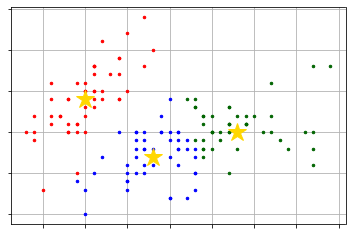

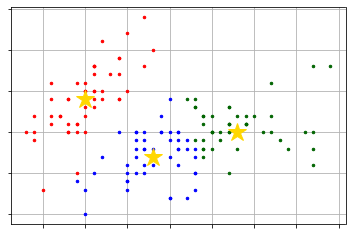

In [16]:
v = cluster_visualizer()
v.append_clusters(previsoes, iris.data[:, 0:2])
v.append_cluster(medoides, data = iris.data[:, 0:2], marker = "*", markersize= 19)
v.show()

In [20]:
lista_previsoes = []
lista_real = []
for i in range(len(previsoes)):
    print('-------')
    print(i)
    print('-------')
    for j in range(len(previsoes[i])):
        #print(j)
        print(previsoes[i][j])
        lista_previsoes.append(i)
        lista_real.append(iris.target[previsoes[i][j]])
    
 

-------
0
-------
7
0
1
2
3
4
5
6
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
106
-------
1
-------
67
53
55
57
59
60
61
62
63
64
66
68
69
70
71
72
73
78
79
80
81
82
83
84
85
87
88
89
90
91
92
93
94
95
96
97
98
99
101
113
114
119
121
123
126
127
133
134
138
142
146
149
-------
2
-------
112
50
51
52
54
56
58
65
74
75
76
77
86
100
102
103
104
105
107
108
109
110
111
115
116
117
118
120
122
124
125
128
129
130
131
132
135
136
137
139
140
141
143
144
145
147
148


In [21]:
lista_previsoes = np.asanyarray(lista_previsoes)
lista_real = np.asanyarray(lista_real)

In [22]:
resultados = confusion_matrix(lista_real, lista_previsoes)

In [23]:
resultados

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 1, 14, 35]])